In [1]:
install.packages("tidyverse")
install.packages("dplyr")
install.packages("RColorBrewer")

Instalando pacote em 'C:/Users/lucas/AppData/Local/R/win-library/4.4'
(como 'lib' não foi especificado)



pacote 'tidyverse' desempacotado com sucesso e somas MD5 verificadas

Os pacotes binários baixados estão em
	C:\Users\lucas\AppData\Local\Temp\Rtmp8adqld\downloaded_packages


Instalando pacote em 'C:/Users/lucas/AppData/Local/R/win-library/4.4'
(como 'lib' não foi especificado)



pacote 'dplyr' desempacotado com sucesso e somas MD5 verificadas


Warning message:
"não foi possível remover a instalação prévia do pacote 'dplyr'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\lucas\AppData\Local\R\win-library\4.4\00LOCK\dplyr\libs\x64\dplyr.dll to C:\Users\lucas\AppData\Local\R\win-library\4.4\dplyr\libs\x64\dplyr.dll: Permission denied"
Warning message:
"'dplyr' restaurado"



Os pacotes binários baixados estão em
	C:\Users\lucas\AppData\Local\Temp\Rtmp8adqld\downloaded_packages


Instalando pacote em 'C:/Users/lucas/AppData/Local/R/win-library/4.4'
(como 'lib' não foi especificado)



pacote 'RColorBrewer' desempacotado com sucesso e somas MD5 verificadas

Os pacotes binários baixados estão em
	C:\Users\lucas\AppData\Local\Temp\Rtmp8adqld\downloaded_packages


In [2]:
library(ggplot2)
library(dplyr)
library(RColorBrewer)


Anexando pacote: 'dplyr'


Os seguintes objetos são mascarados por 'package:stats':

    filter, lag


Os seguintes objetos são mascarados por 'package:base':

    intersect, setdiff, setequal, union




In [3]:
df_nba <- read.csv("nba/nba_stats.csv", header = TRUE, sep = ",")
df_nba$salary <- as.double(gsub("[\\$,]", "", df_nba$salary))
df_nba$salary <- df_nba$salary / 1e6 
str(df_nba)

'data.frame':	8162 obs. of  55 variables:
 $ year                            : int  1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 ...
 $ name                            : chr  "Allen Iverson" "Allen Iverson" "Allen Iverson" "Allen Iverson" ...
 $ playerId                        : int  366 366 366 366 366 366 366 366 366 366 ...
 $ playerSlug                      : chr  "allen-iverson" "allen-iverson" "allen-iverson" "allen-iverson" ...
 $ positionId                      : chr  "SG" "SG" "SG" "SG" ...
 $ teamId                          : chr  "PHI" "PHI" "PHI" "PHI" ...
 $ status                          : chr  "inactive" "inactive" "inactive" "inactive" ...
 $ gamesPlayed                     : num  48 70 71 60 82 48 75 72 65 82 ...
 $ avgMinutes                      : num  41.5 40.8 42 43.7 42.5 ...
 $ avgFouls                        : num  2.04 2.31 2.07 1.7 1.82 ...
 $ flagrantFouls                   : num  0 0 0 0 0 0 0 0 0 0 ...
 $ technicalFouls                  : num  5 12 18

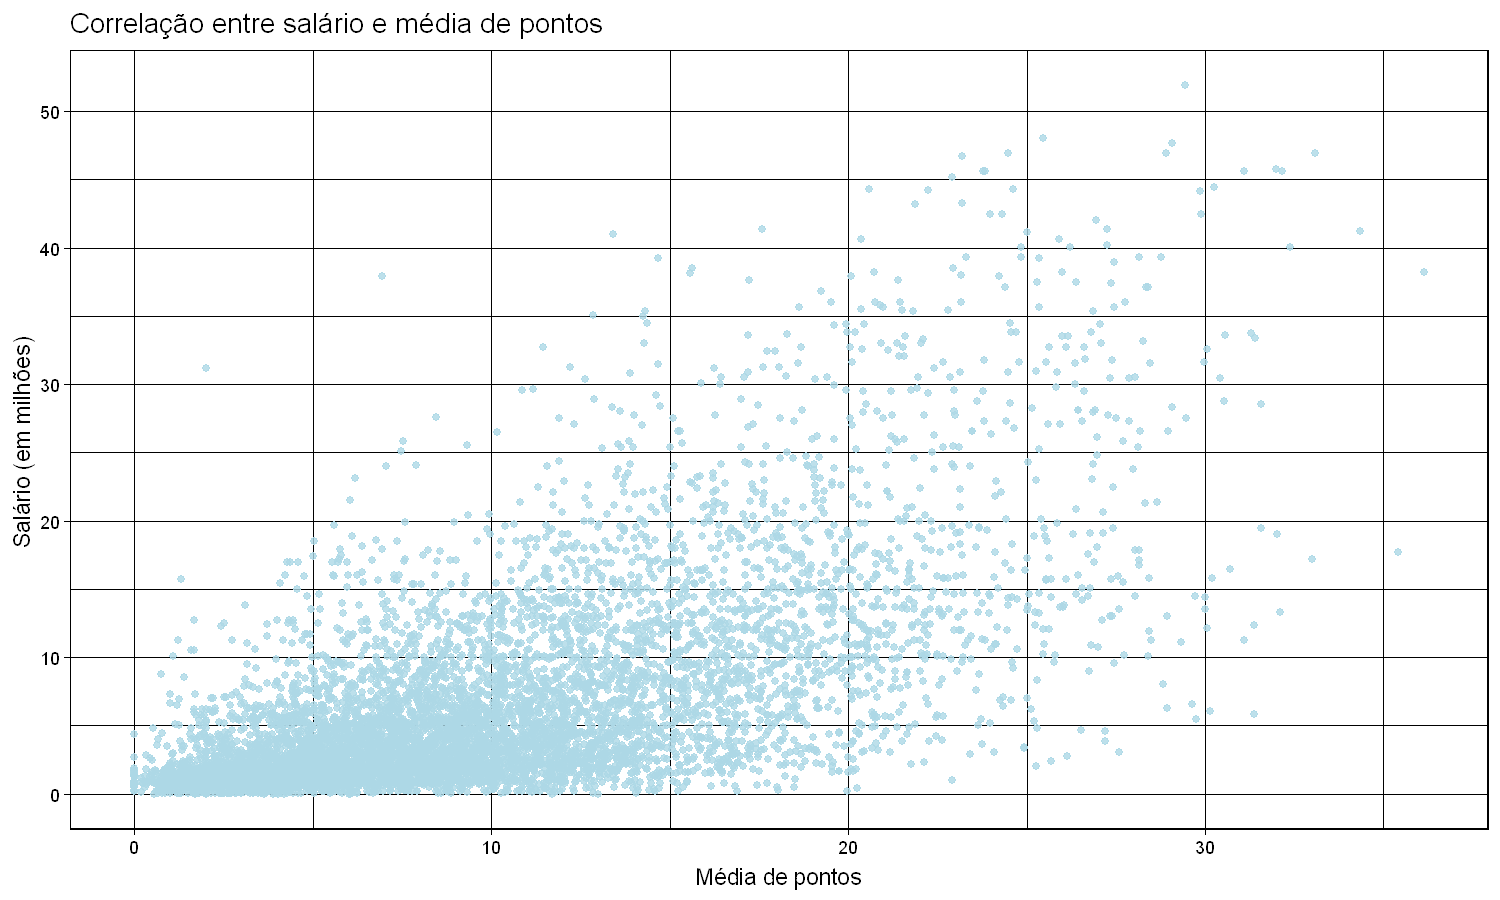

In [4]:
options(repr.plot.width = 10, repr.plot.height = 6, repr.plot.res = 150)



ggplot(data = df_nba, mapping = aes(x = avgPoints, y = salary)) +
    geom_point(color = "lightblue", alpha = 0.8) +
    labs(
        title = "Correlação entre salário e média de pontos",
        x = "Média de pontos",
        y = "Salário (em milhões) ",
    ) +
    theme_linedraw()

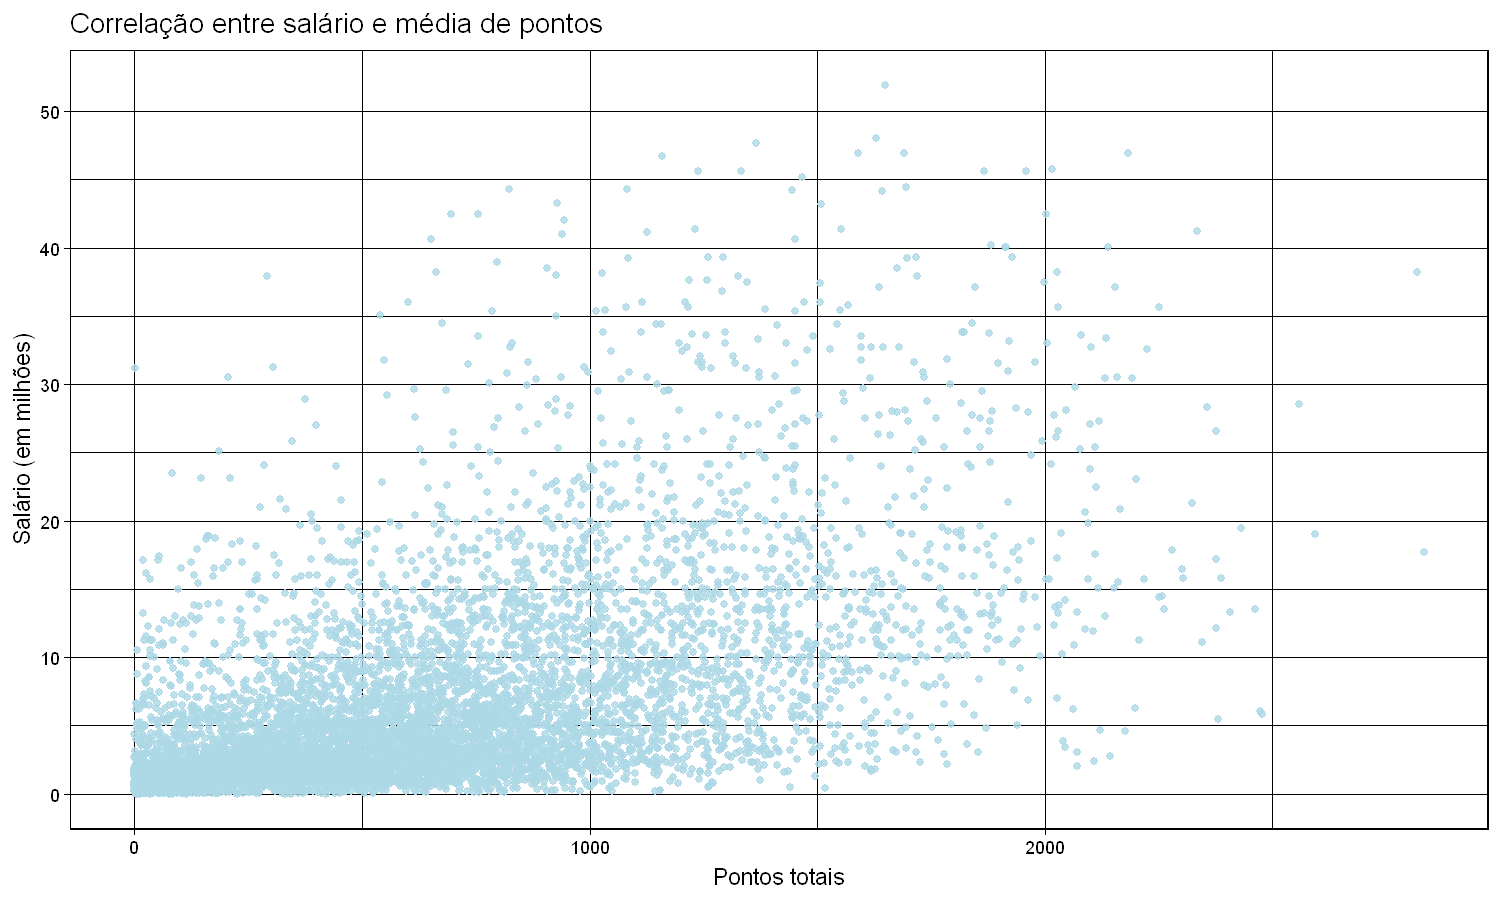

In [5]:
ggplot(data = df_nba, mapping = aes(x = points, y = salary)) +
    geom_point(color = "lightblue", alpha = 0.8) +
    labs(
        title = "Correlação entre salário e média de pontos",
        x = "Pontos totais",
        y = "Salário (em milhões)",
       
    ) +
    theme_linedraw()

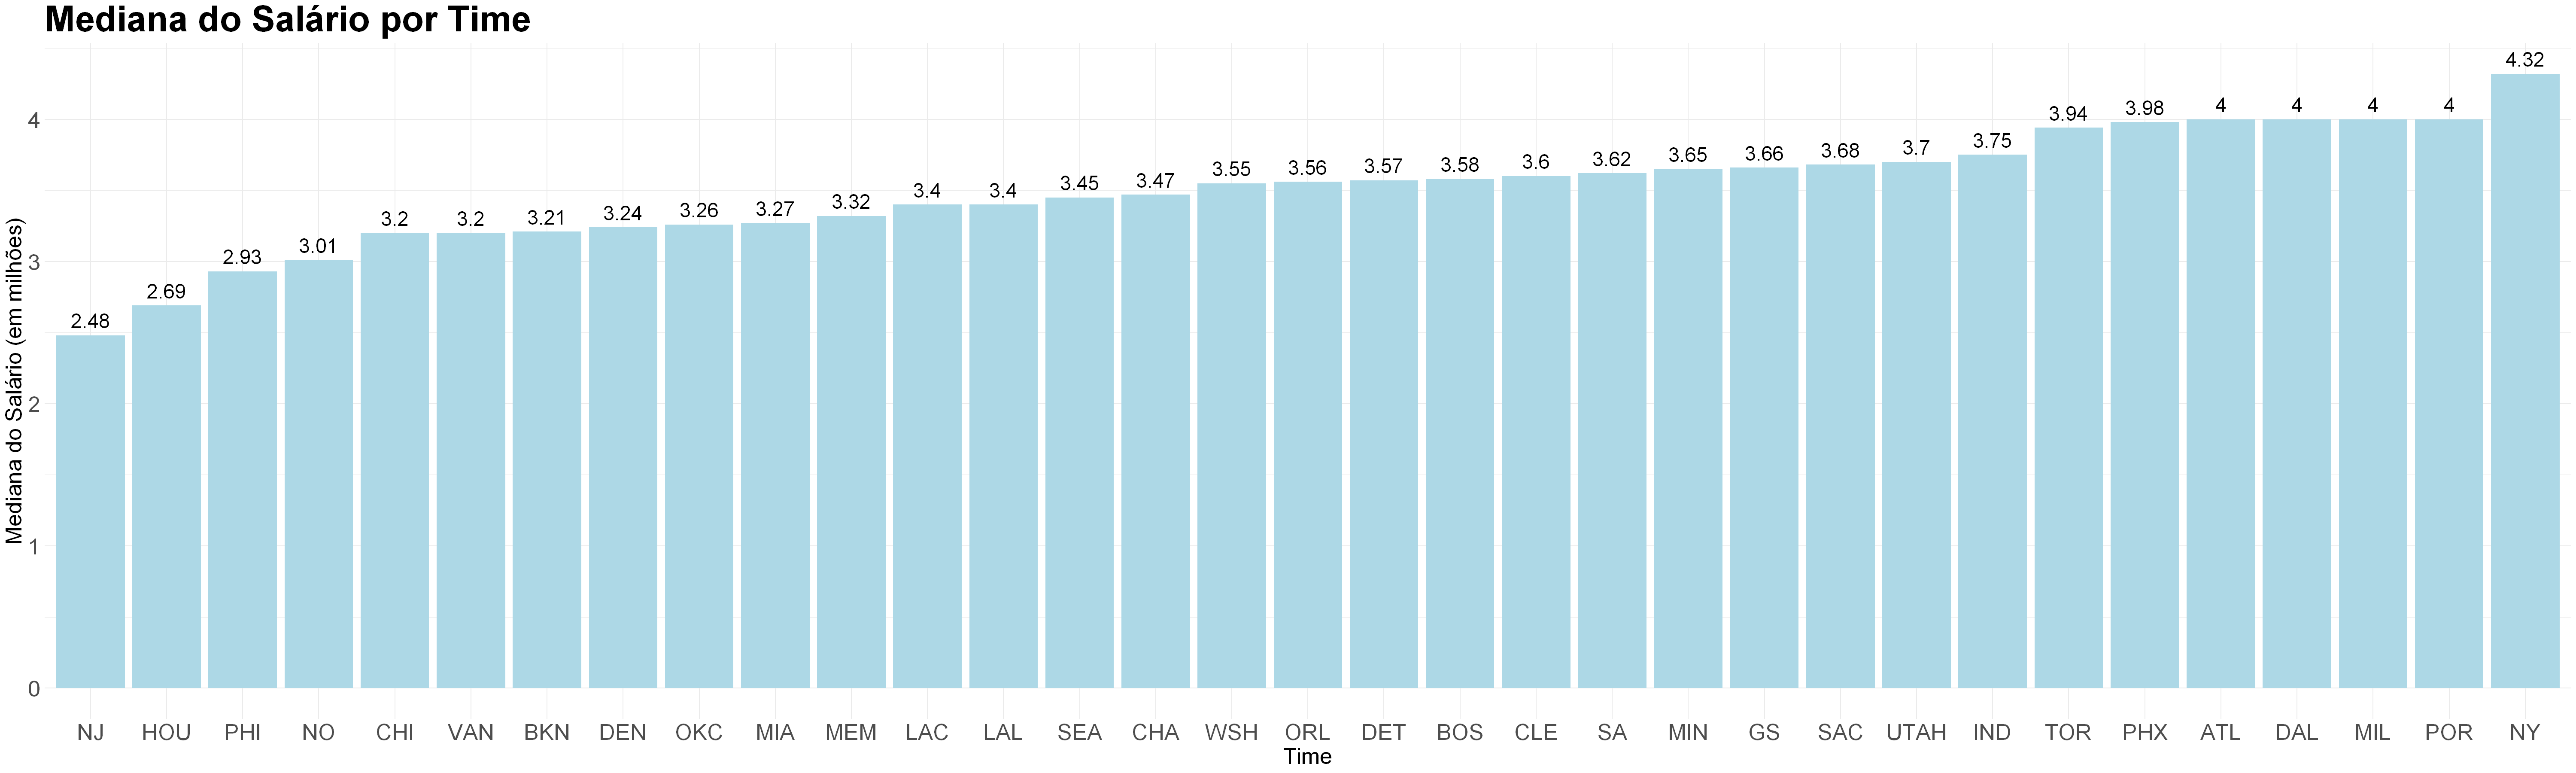

In [6]:
options(repr.plot.width = 40, repr.plot.height = 12, repr.plot.res = 150)

mediana_salario_por_time <- df_nba %>%
  group_by(teamId) %>%
  summarize(mediana_salario = median(salary, na.rm = TRUE)) %>%
  arrange(desc(mediana_salario))

mediana_salario_por_time$mediana_salario = sapply(mediana_salario_por_time$mediana_salario, function(mediana_salario) return(round(mediana_salario,2)))

ggplot(mediana_salario_por_time, aes(x = reorder(teamId, mediana_salario), y = mediana_salario)) +
  geom_bar(stat = "identity", fill = "lightblue") +
  geom_text(aes(label = mediana_salario), vjust = -0.5, size = 8) +
  labs(
    title = "Mediana do Salário por Time",
    x = "Time",
    y = "Mediana do Salário (em milhões)"
  ) +
  theme_minimal() +
  theme(
    plot.title = element_text(size = 40, face = "bold"), 
    axis.title.x = element_text(size = 25),  
    axis.title.y = element_text(size = 25), 
    axis.text.x = element_text(size = 25), 
    axis.text.y = element_text(size = 25)  
  )


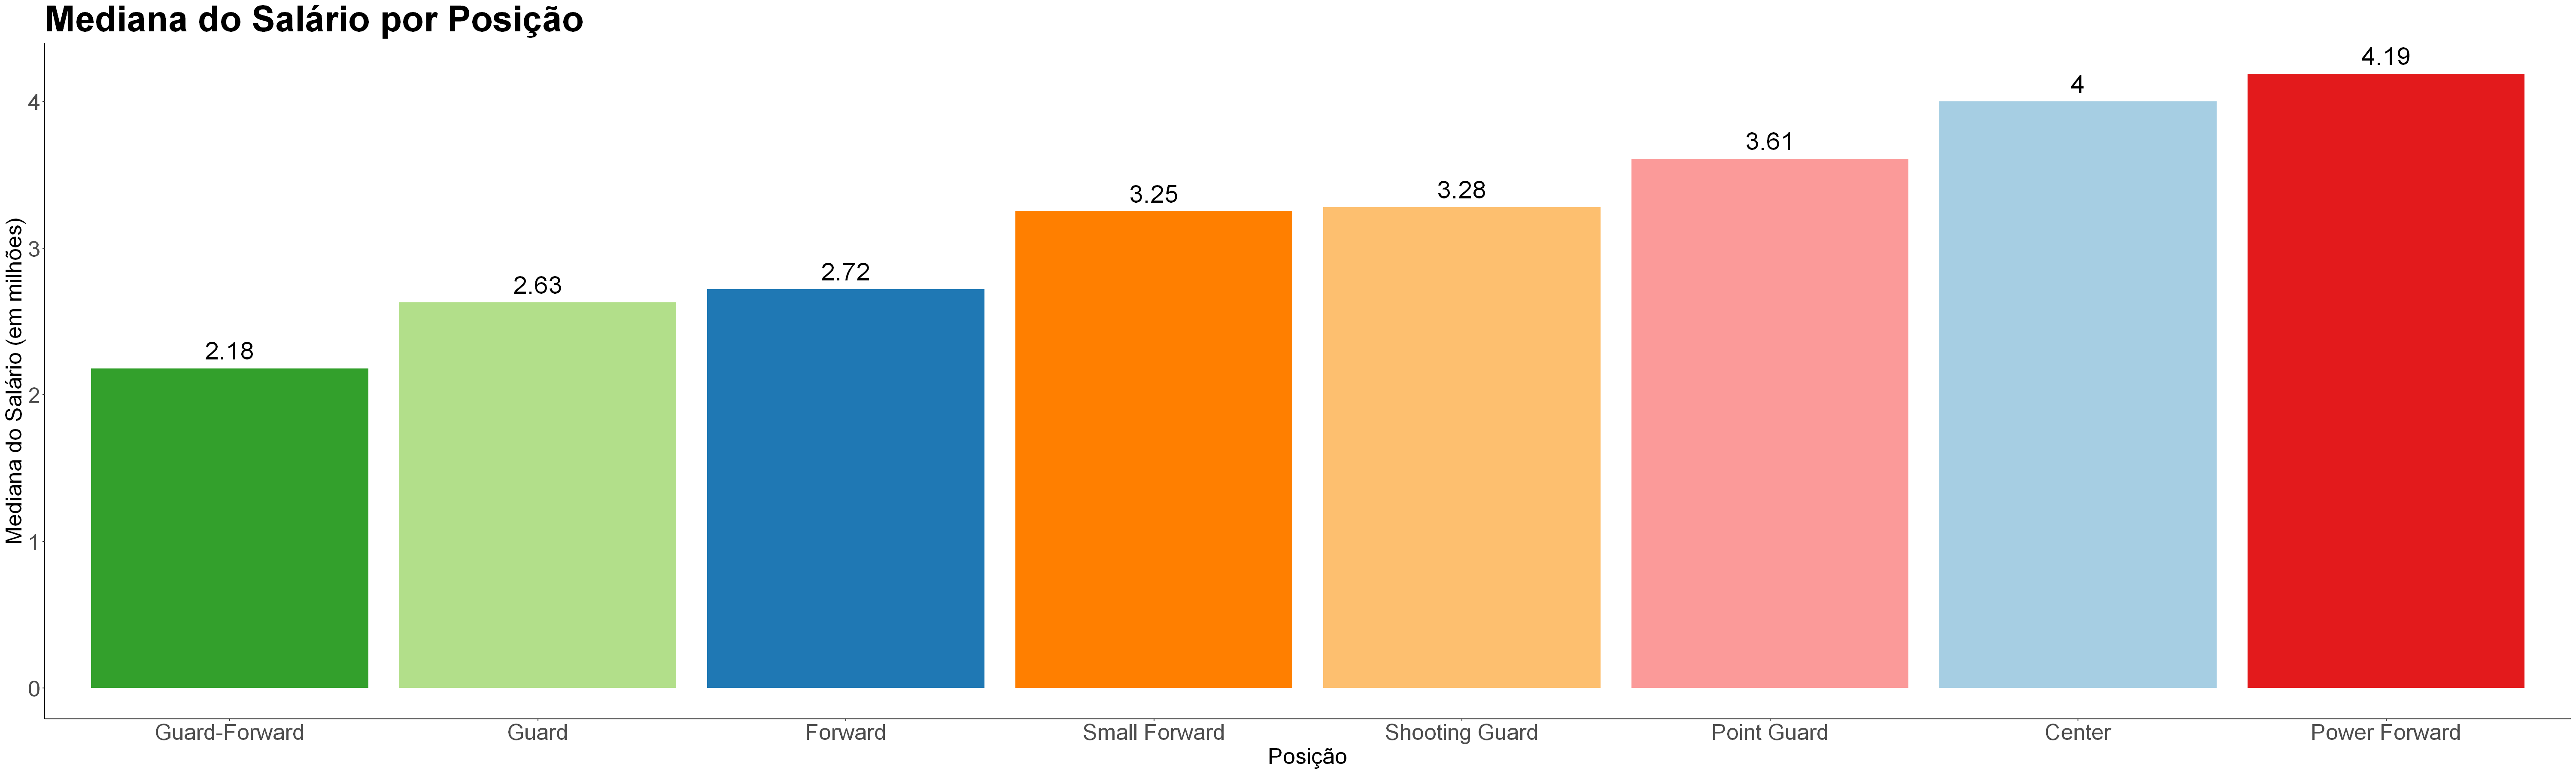

In [7]:

mediana_salario_por_posicao <- df_nba %>%
  filter(position != "Not Available") %>%
  group_by(position) %>%
  summarize(mediana_salario = median(salary, na.rm = TRUE)) %>%
  arrange(desc(mediana_salario))

mediana_salario_por_posicao$mediana_salario <- sapply(mediana_salario_por_posicao$mediana_salario, function(mediana_salario) return(round(mediana_salario,2)))

ggplot(mediana_salario_por_posicao, aes(x = reorder(position, mediana_salario), y = mediana_salario)) +
  geom_bar(stat = "identity", aes(fill = position), show.legend = FALSE) + 
  geom_text(aes(label = mediana_salario), vjust = -0.5, size = 10) +
  labs(
    title = "Mediana do Salário por Posição",
    x = "Posição",
    y = "Mediana do Salário (em milhões)"
  ) +
  scale_fill_brewer(palette = "Paired") + 
  theme_classic() + 
  theme(
    plot.title = element_text(size = 40, face = "bold"),  
    axis.title.x = element_text(size = 25),  
    axis.title.y = element_text(size = 25),  
    axis.text.x = element_text(size = 25), 
    axis.text.y = element_text(size = 25)  
  )

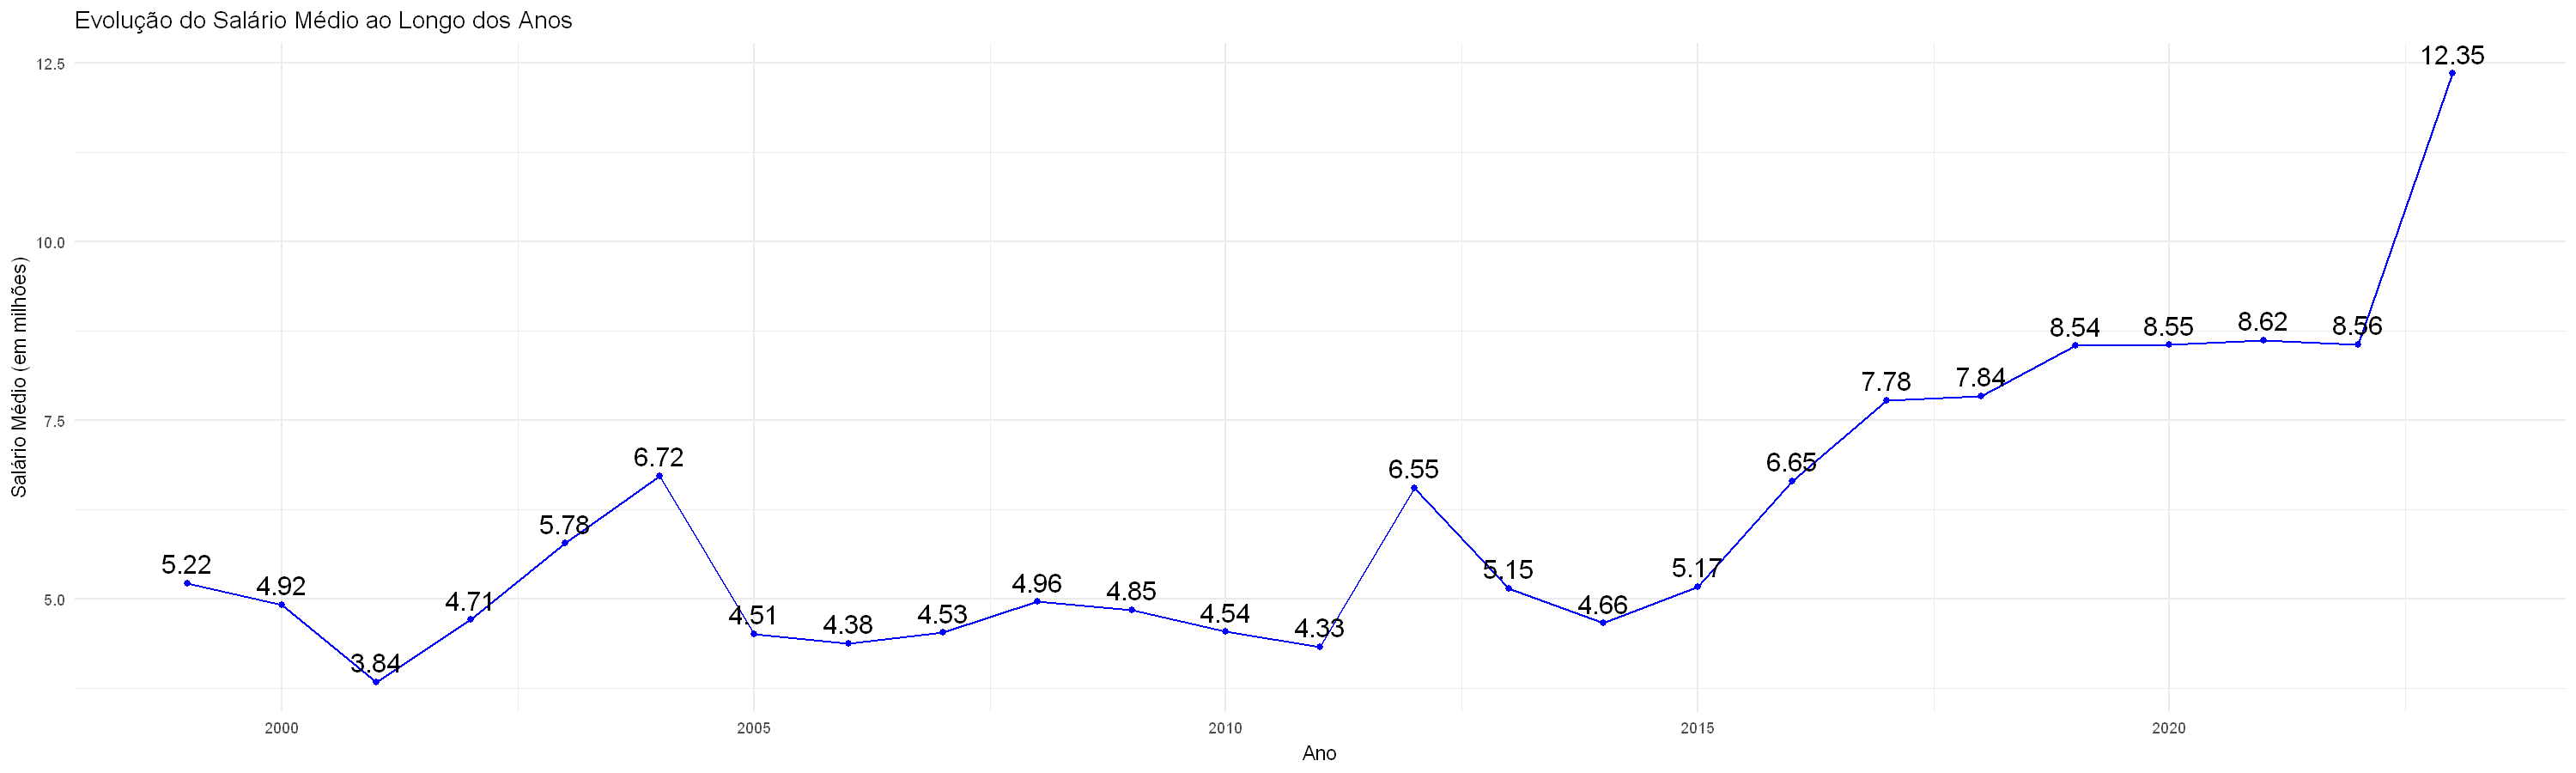

In [8]:
options(repr.plot.width = 20, repr.plot.height = 6, repr.plot.res = 150)

salario_medio_ano <- df_nba %>%
  filter(!is.na(salary)) %>%
  group_by(year) %>%
  summarize(salario_medio = mean(salary), na.rm = TRUE)

salario_medio_ano$salario_medio <- sapply(salario_medio_ano$salario_medio, function(salario_medio) return(round(salario_medio,2)))

ggplot(salario_medio_ano, aes(x = year, y = salario_medio)) +
  geom_line(color = "blue") +
  geom_text(aes(label = salario_medio), vjust = -0.5, size = 5) +
  geom_point(color = "blue") +
  labs(
    title = "Evolução do Salário Médio ao Longo dos Anos",
    x = "Ano",
    y = "Salário Médio (em milhões)"
  ) +
  theme_minimal()

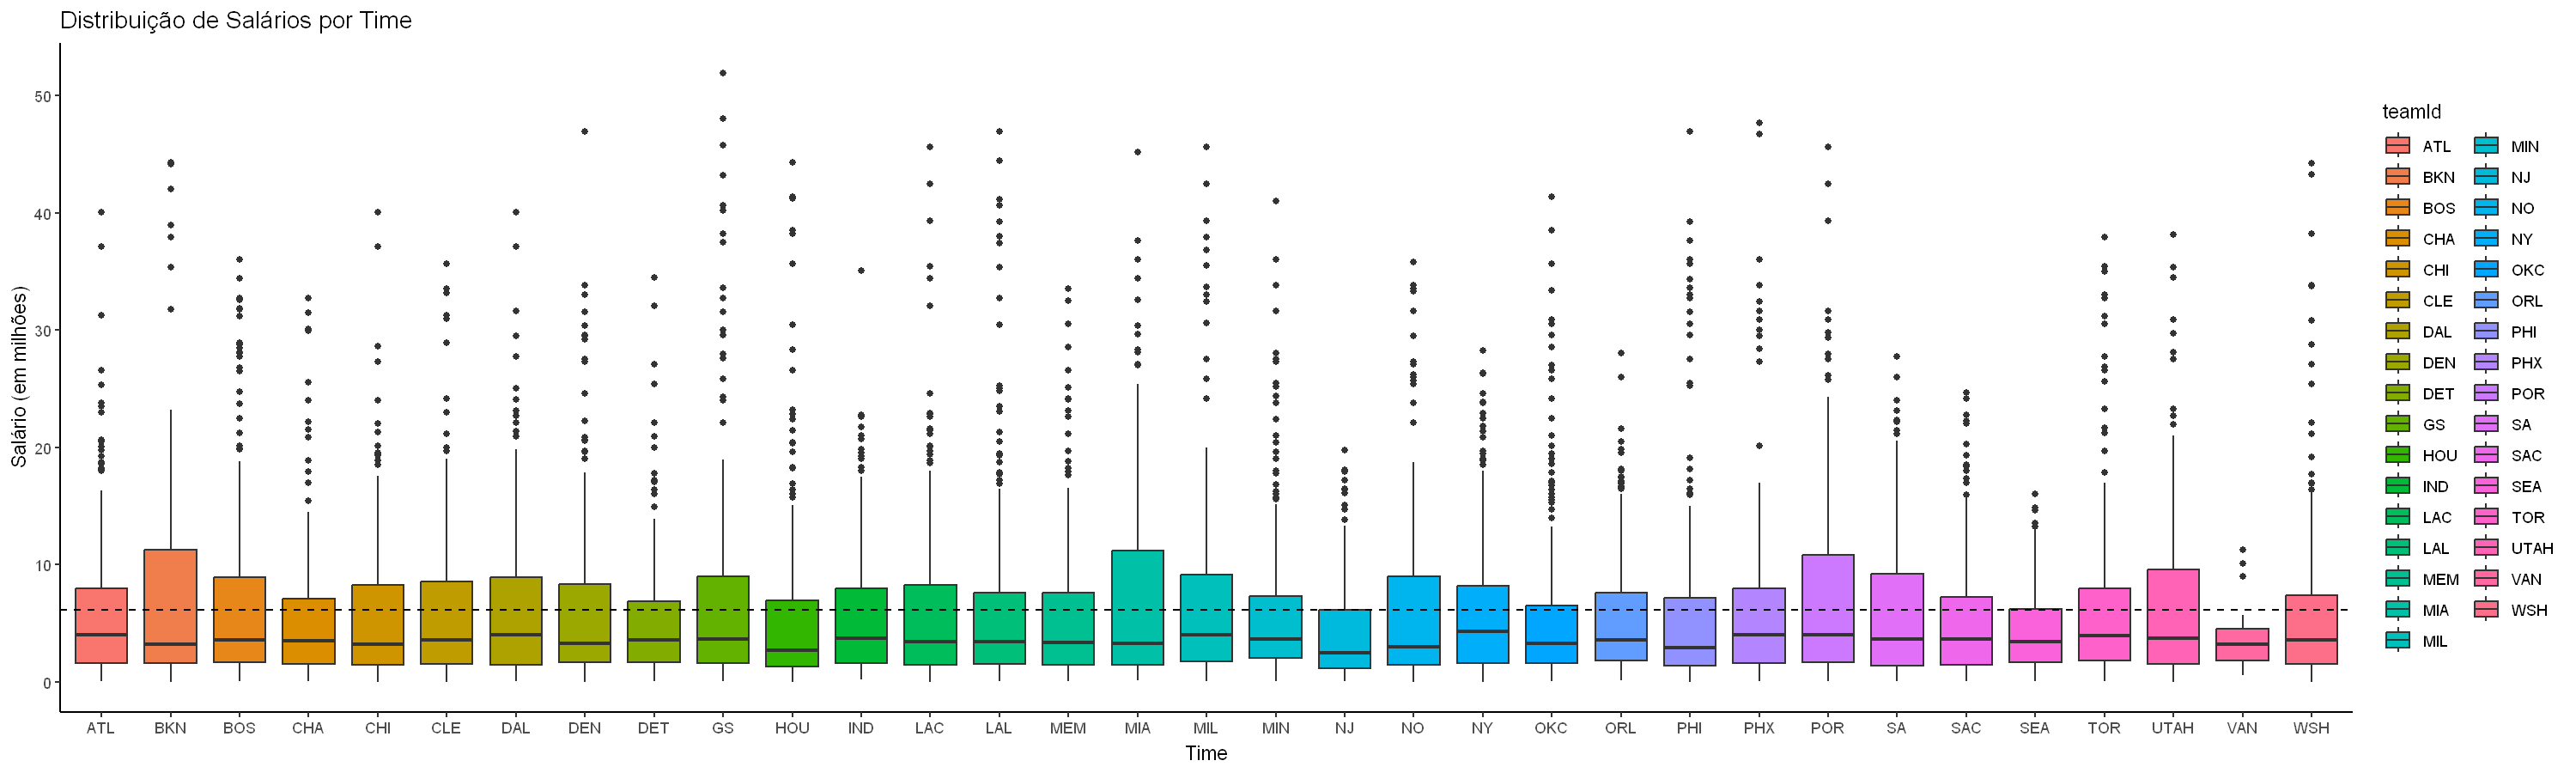

In [9]:
nba_data_filtered <- df_nba %>%
  filter(!is.na(salary) & !is.na(teamId))

ggplot(nba_data_filtered, aes(x = teamId, y = salary)) +
  geom_boxplot(aes(fill = teamId)) +
  geom_hline(yintercept = mean(nba_data_filtered$salary), color = "black", linetype = "dashed") +
  labs(
    title = "Distribuição de Salários por Time",
    x = "Time",
    y = "Salário (em milhões)"
  ) +
  theme_classic()